# Домашнее задание №1 Кирилл Сетдеков

## 1
(2 балла) Для чего нужно понятие стационарности в анализе временных рядов? Перечислите все случаи и распишите свой ответ.

**ответ**

Понятие стационарности в анализе временных рядов необходимо для оценки и прогнозирования поведения данных во времени. Стационарный временной ряд предполагает, что его характеристики (среднее, дисперсия, автокорреляция) не меняются со временем. Это позволяет использовать различные методы статистического анализа, такие как авторегрессионные, автокорреляционные модели, дискретные преобразования Фурье и другие подходы, которые требуют этого свойства как одну из предпосылок.

Перечислим основные примеры, когда требуется работать со стационарным временным рядом:
1. Прогнозирование поведения акций на фондовых биржах или курсов валют, где изменения цен могут быть связаны с различными факторами экономического и политического характера.
2. Анализ поведения клиентов в каком-либо бизнесе, когда необходимо выявить тенденции в изменении продаж, заказов и т.д.
3. Изучение изменений климата, где на основе временных рядов температуры или осадков можно оценивать долгосрочные тенденции.

В этих случаях, скорее всего ряд изначально не стационарный и нужно его приводить к стационарному виду.

## 2
(1 балл) Рассмотрите картинку ![Image with plots](data/images/ts_types.png)

a. Назовите ряды с гетероскедастичностью 

b. Какие ряды имеют сезонность? 

с. Какие ряды имеют цикличность? 

d. Какие ряды можно приблизить моделью интегрированного ряда?

e. Какие ряды можно считать стационарными?

**ответ**

1. Рядя с гетероскедастичностью - те, которые с непостоянной дисперсией по времени :e, g, i
2. Ряды с сезонностью - те, которые имеют похожие признаки, которые повторяются с одним периодом, на вид :  g, i
3. Ряд цикличный, который имеет повторяющиеся пэттерны, но с разным периодом: d, h
4. Ряды, которые можно приблизить моделью интегрированного ряда - те, которые на взгляд будут стационарны, если взять раз диффиренциирование: a, c, e, f
5. Ряды стационарные на этой картинке: b

## 3
(3 балла) Рассмотрите один из графиков индекса Доу-Джонса (data/dataset/dow_jones.csv). Предположим, вы можете сделать только одно преобразование ряда, чтобы сделать его стационарным. Какое преобразование вы выберете и почему? Сделайте это преобразование, проверьте, получили ли вы стационарный ряд. Какой ARMA моделью можно описать получившийся стационарный ряд?

**ответ**

Временной ряд биржевый котировок часто считают мартингалом, и считают, что в первом приближении, нельзя предсказать следующее значение лучше, чем фиксированным прогнозом от прошлой точки. Также дельты ряда финансовых данных имеют логнормальное распределение. На вид ряда "dow_jones_0" так и есть, проверим его стационарность после diff()

После диффиренциирования ряд на вид стационарный, расширенный тест Дики — Фуллера не отвергает гипотезу о стационарности ряда, частичные автокорреляции не значимы. Ряд будет описан хорошо процессом  AR(1).

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PowerTransformer
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace import sarimax
from statsmodels.tsa.stattools import adfuller
from scipy.signal import periodogram

import plotting
from load_dataset import Dataset


In [2]:
dataset = Dataset('data/dataset/')
dow = dataset['dow_jones_0.csv']

e:\code\ts_march_2023\load_dataset.py:34: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  ts = pd.read_csv(


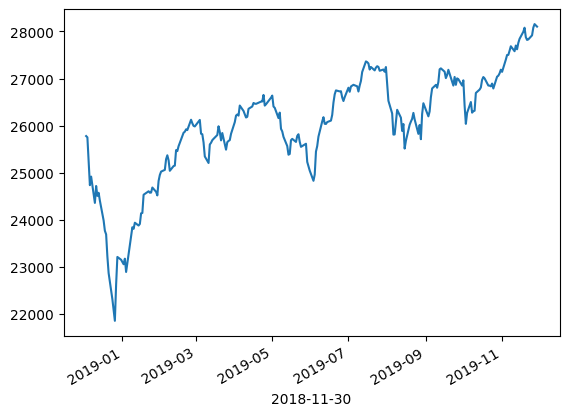

In [3]:
dow.plot()
plt.show()

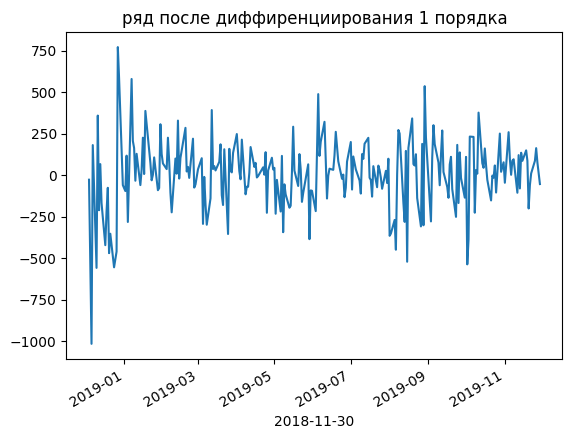

e:\code\ts_march_2023\venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


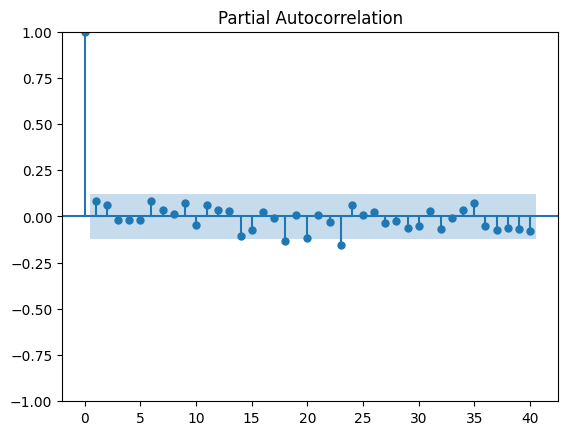

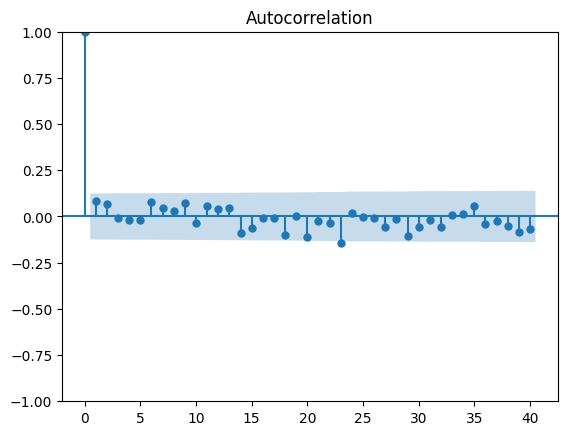

In [4]:
dow.diff().plot()
plt.title('ряд после диффиренциирования 1 порядка')
plt.show()
plot_pacf(dow.diff().dropna(), lags=40)
plt.show()
plot_acf(dow.diff().dropna(), lags=40)
plt.show()

In [5]:
adfuller(dow.diff().dropna())[1]

7.270680965724108e-27

## 4



(2 балла) Рассмотрите ряд data/dataset/stl_example.csv. Постройте для него график автокорреляции.̆ Обьясните закономерности, которые вы видите.

**ответ**

Мы видим периодичные значимые члены как в графике PACF, так и ACF.
Выводы относительно этого:

1. Точно есть сезонность с периодом 5 и/или 6
2. При этом по графикам, я бы оценил процесс, как имеющий примерно AR(2) и MA(>1), так как PACF члены значимы до 2, а для ACF члены значимы вплоть до ожидаемой сезонности.


e:\code\ts_march_2023\load_dataset.py:34: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  ts = pd.read_csv(


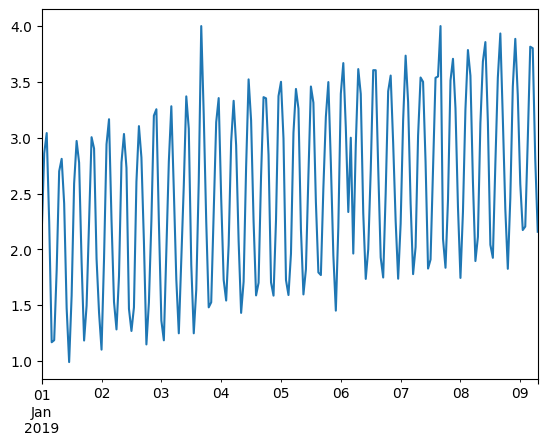

e:\code\ts_march_2023\venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


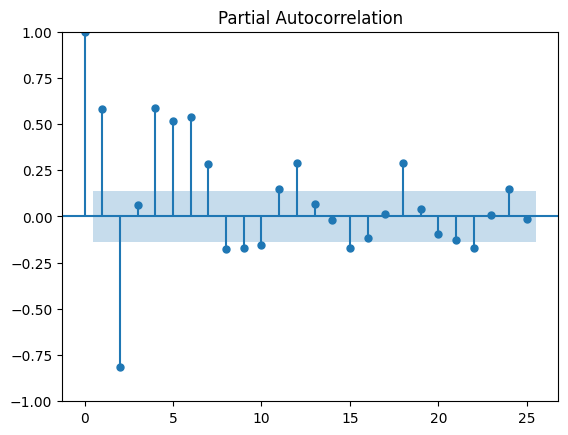

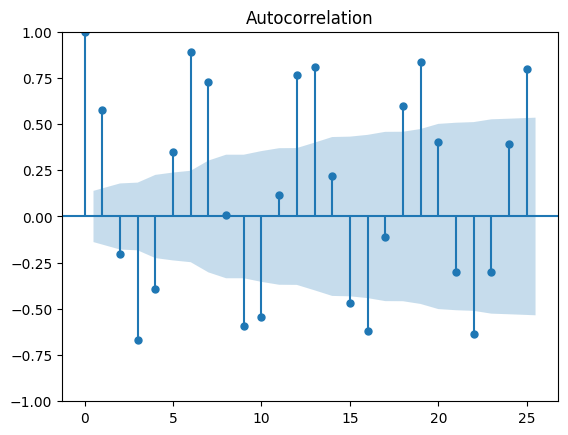

In [6]:
stl_ex = dataset['stl_example.csv']
stl_ex.plot()
plt.show()
plot_pacf(stl_ex, lags=25)
plt.show()
plot_acf(stl_ex, lags=25)
plt.show()

## 5

(4 балла) На семинаре, посвященном stl разложению мы находили период сезонности сезонных временных рядов при помощи графика автокорреляций. Однако, если бы мы захотели построить автоматическую систему определения периода, мы бы уже не могли “вручную” анализировать каждый график. Таким образом вам необходимо написать функцию get_seasonal_period(), которая бы автоматически определяла период сезонных временных рядов, использую автокорреляционную функцию.

**решение**

ниже реализация функции


In [7]:
def get_seasonal_period(ts):
    """считалка длины периода

    Args:
        ts: времянной ряд

    Returns:
        int: длина периода, с максимальной значимостью
    """    
    f, ppx = periodogram(ts)
    top_feq = list(sorted(zip(f, ppx), key=lambda x: x[1]))[-1]
    period = np.round(1/top_feq[0], 0)
    return period

get_seasonal_period(stl_ex)

6.0

## 6
(4 балла) Используя подход box-jenkins построит̆е модель ARIMA для временного ряда dow_jones_0. Сделайте прогноз на 30 точек вперед. Интерпретируйте полученный результат.


выше уже я описал, что для этого ряда подойдет AR(1), MA(0) процесс без сезонных составляющих

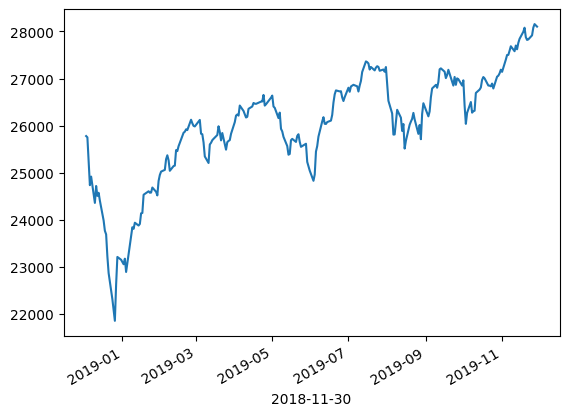

In [8]:
dow.plot()
plt.show()

In [9]:
# разделим на трейн и тест
train_test_split_index = len(dow)-30
ts, ts_test = dow[:train_test_split_index], dow[train_test_split_index:]
# сделаем нормализацию
transformer = PowerTransformer()
ts_transformed = pd.Series(transformer.fit_transform(ts.values.reshape(-1, 1)).reshape((-1,)), index=ts.index)
# функция для обращения
def inverse_series(series, indexer=None, transformer=transformer):
    if indexer is None:
        indexer = series.index

    ts_transformed = pd.Series(transformer.inverse_transform(series.values.reshape(-1, 1)).reshape((-1,)), index=indexer)
    return ts_transformed

In [10]:
pdq = (1, 1, 0)
PDQ = (0, 0, 0, 0)
model = sarimax.SARIMAX(ts_transformed, order=pdq, seasonal_order=PDQ)

e:\code\ts_march_2023\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
e:\code\ts_march_2023\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [11]:
res = model.fit()
preds = res.forecast(30)

e:\code\ts_march_2023\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [12]:
res.polynomial_ar

array([ 1.        , -0.08063204])

In [13]:
plotting.plot_ts( ts_test, inverse_series(preds, ts_test.index), ts)

Loading BokehJS ...

In [14]:

print(f'константный прогноз, RMSE  {mean_squared_error(ts_test, pd.Series(ts[-1].repeat(30)), squared=False):.1f}')
print(f'прогноз из AR модели, RMSE {mean_squared_error(ts_test, inverse_series(preds, ts_test.index), squared=False):.1f}')
print(f'прирост в % от модели {(-mean_squared_error(ts_test, inverse_series(preds, ts_test.index), squared=False)+mean_squared_error(ts_test, pd.Series(ts[-1].repeat(30)), squared=False))/mean_squared_error(ts_test, pd.Series(ts[-1].repeat(30)), squared=False)*100:.1f} %')

константный прогноз, RMSE  635.4
прогноз из AR модели, RMSE 631.6
прирост в % от модели 0.6 %


**ответы**
1. прогноз - почти прямая линия
2. Коэффициент при лаге 1 :  -0.08063204, достаточно низкий, поэтому даже на второй точке уже не видна разница относительно константного прогноза
3. Вывод - ряд реалистично нельзя прогнозировать лучше, чем констатный прогноз (разница в RMSE меньше 1%)